In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [52]:
alpha = 0.99
S     = 1000

# 1) Standard Monte Carlo

In [53]:
def density(x):
    return 2/(np.exp(x)+np.exp(-x))**2

def invert_F_L(x):
    return np.arctanh(2*x-1)

In [54]:
VaR = invert_F_L(alpha)
ES = []
for i in range(S):
    Uni    = np.random.uniform(0,1,S) 
    L      = invert_F_L(Uni)
    L      = [k for k in L if k >= VaR]
    ES_val = np.mean(L)
    ES     = ES + [ES_val]

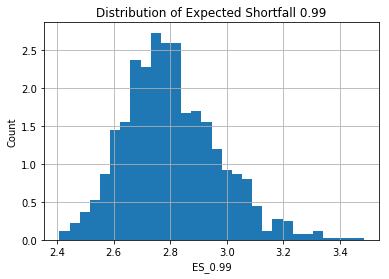

In [55]:
plt.hist(ES, bins=30, normed=1)
plt.xlabel('ES_0.99')
plt.ylabel('Count')
plt.yscale('linear')
plt.title("Distribution of Expected Shortfall 0.99")
plt.grid(True)
plt.show()

In [56]:
np.mean(ES)

2.8050486718843222

In [57]:
np.std(ES)

0.16726560251179376

# 2) Monte Carlo with importance sampling

In [58]:
def G_L(x,alpha):
    VaR = invert_F_L(alpha)
    return np.exp(-(x-VaR))

def invert_G_L(x,alpha):
    VaR = invert_F_L(alpha)
    return VaR - np.log(1-x)

In [59]:
ES_IS = []
for i in range(S):
    Uni      = np.random.uniform(0,1,S) 
    G_invert = invert_G_L(Uni,alpha)
    r_L      = density(G_invert)/G_L(G_invert,alpha)
    ES_value = np.mean(G_invert*r_L)/(1-alpha)
    ES_IS    = ES_IS + [ES_value]

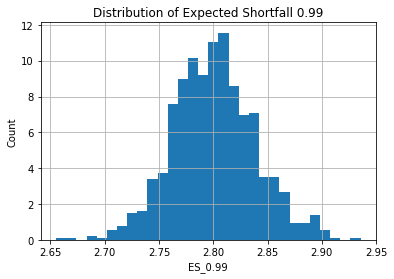

In [60]:
plt.hist(ES_IS, bins=30, normed=1)
plt.xlabel('ES_0.99')
plt.ylabel('Count')
plt.yscale('linear')
plt.title("Distribution of Expected Shortfall 0.99")
plt.grid(True)
plt.show()

In [61]:
np.mean(ES_IS)

2.8007628192210028

In [62]:
np.std(ES_IS)

0.038197269876445311